# Task 1
- Open a new Jupyter notebook and name it etivity1.ipynb. 
-- In this notebook, perform EDA of the bank dataset by following the notebook Tutorial 1-1 - Exploratory Data Analysis.ipynb as an example.

- Formulate a particular question that might be interesting to answer by exploring the 
bank dataset (approx. 50 words in a markdown cell).

- Calculate statistics for the numerical and categorical attributes. 

- Draw a short conclusion (approx. 150 words in a markdown cell).

- Use at least two different plotting techniques to plot the distribution of some numerical attributes. 
                                                                                                   
- Draw short conclusions (approx. 150 words in a markdown cell).
                                                                                                   
- Generate at least two plots with the combined distribution of attributes. 
                                                                                                   
- Draw a short conclusion (approx. 150 words in a markdown cell).
                                                                                                   
- Make sure your conclusions are related to the question you have formulated.


# A. Importing Modules and Dataset

In [1]:
# The Python modules uses in this tutorial are:

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# needed for changing Ordinal values - see education
pd.set_option("future.no_silent_downcasting", True)

col_dict = {



"age":"age",
   "job" : "type of job",
   "marital" : "marital status",
   "education":"education",
   "default":"has credit in default?",
   "balance":" average yearly balance, in euros (numeric) ",
   "housing":" has housing loan? ",
   "loan":" has personal loan? ",
   
   "contact":" contact communication type ",
  "day":" last contact day of the month (numeric)",
  "month":" last contact month of year ",
  "duration":" last contact duration, in seconds (numeric)",
  
  "campaign":" number of contacts performed during this campaign and for this client (numeric, includes last contact)",
  "pdays":" number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)",
  "previous":" number of contacts performed before this campaign and for this client (numeric)",
  "poutcome":" outcome of the previous marketing campaign (categorical: unknown,other,failure,success)", 
  "subscribed":" has the client subscribed a term deposit? "
}

In [2]:
df = pd.read_csv('./bank.csv')

# B. Data Exploration

In [3]:
print (len (df), ' Rows Read')
# Print first 5 rows of the dataframe
df.head(5)

2000  Rows Read


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [4]:
# Print last 5 rows of the dataframe
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


# Quick Examination of Numerical Attributes

In [5]:
# Print statistical summary for all numerical attributes
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


Column Data Dictionary
- #1 - age (numeric)
- #6 - balance: average yearly balance, in euros (numeric) 
- #10 - day: last contact day of the month (numeric)
- #12 - duration: last contact duration, in seconds (numeric)
- #13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- #14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
-  #15 - previous: number of contacts performed before this campaign and for this client (numeric)

**Observations**
1. Missing 12 records for Age
1. Average age of people is 41
1. Average balance is 1413
1. Std Deviation of Balance suggests balances differ significantly from the mean.  This would seem to be confirmed by the mean being approximately 2.5 times larger than the median value.
1. a min of 0 for previous & -1 fpr days, shows some people have never been contacted

In [6]:
# just get a sense of the data + values, df.info() would give column non null counts
for column in df.columns:
    print(f"Column: {column}")
    
    valueCounts = df[column].value_counts()

    total = valueCounts.sum()

    valueCounts['Total'] = total

    print (valueCounts);
    print ()

Column: age
age
33.0       95
35.0       90
31.0       87
34.0       84
32.0       77
         ... 
73.0        2
81.0        2
79.0        1
18.0        1
Total    1988
Name: count, Length: 69, dtype: int64

Column: job
job
management        461
technician        348
blue-collar       298
admin.            247
services          165
retired           162
student            96
unemployed         69
self-employed      64
entrepreneur       45
housemaid          35
Total            1990
Name: count, dtype: int64

Column: marital
marital
married     1111
single       674
divorced     215
Total       2000
Name: count, dtype: int64

Column: education
education
secondary     995
tertiary      684
primary       217
Total        1896
Name: count, dtype: int64

Column: default
default
no       1985
yes        15
Total    2000
Name: count, dtype: int64

Column: balance
balance
0          86
1           9
272         8
303         7
655         6
         ... 
511         1
1355        1
2549     

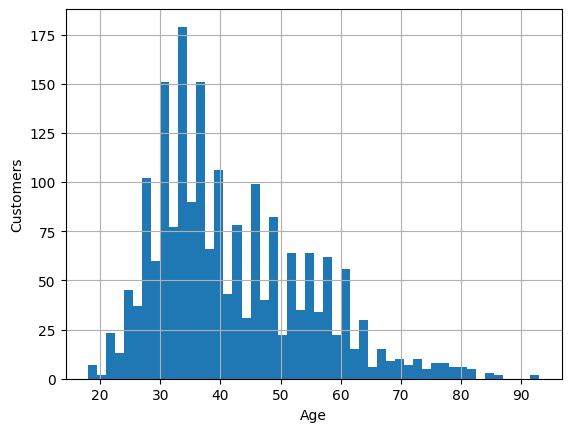

In [7]:
df['age'].hist(bins=50);
plt.xlabel('Age');
plt.ylabel('Customers');
plt.show()

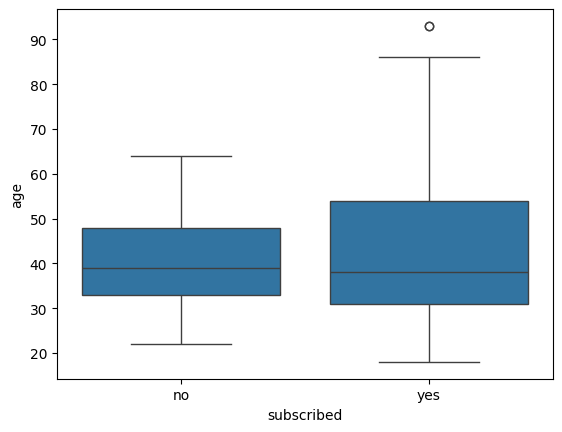

In [8]:
# age profile of those that subscribed
data_without_nulls = df[['age','subscribed']].dropna()
sns.boxplot(y='age', x = 'subscribed' ,data=data_without_nulls)
plt.show()

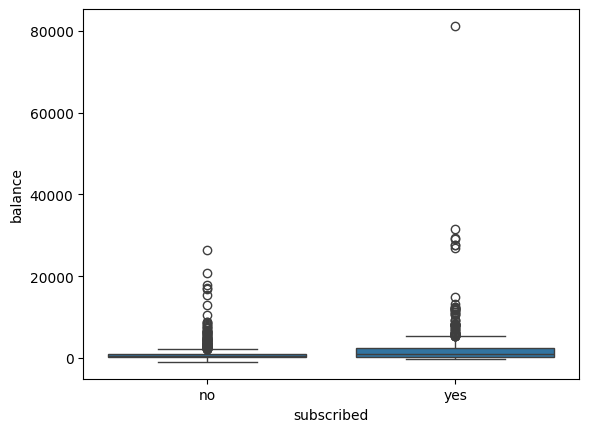

In [9]:
# balance profile of those that subscribed
data_without_nulls = df[['balance','subscribed']].dropna()
sns.boxplot(y='balance', x = 'subscribed' ,data=data_without_nulls)
plt.show()

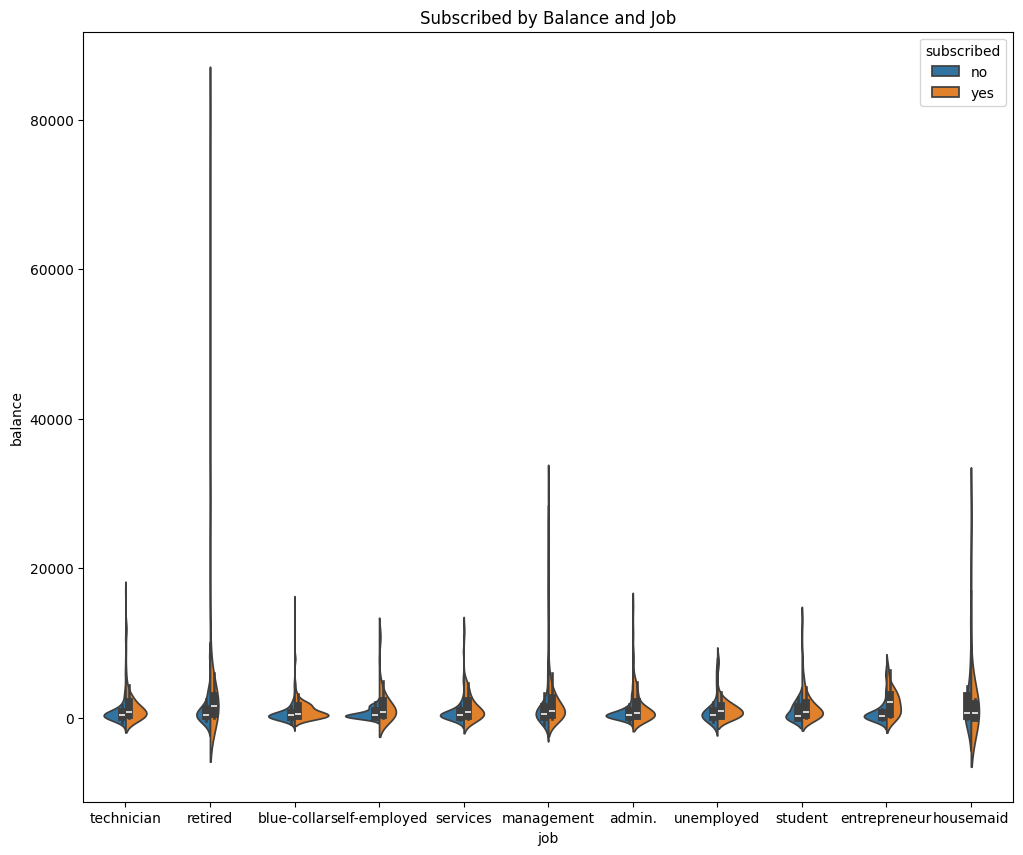

In [10]:

plt.figure(figsize=(12,10))
sns.violinplot(data=df, x='job', y='balance', hue='subscribed', split=True)
plt.title('Subscribed by Balance and Job')
plt.show()

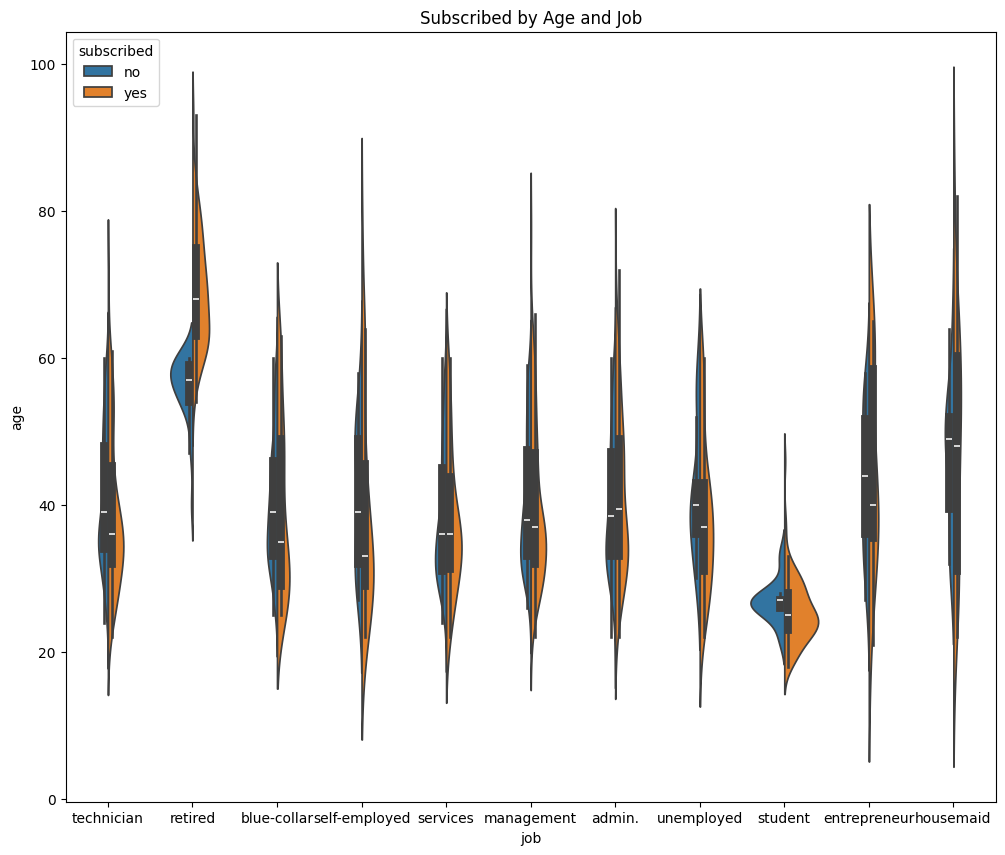

In [11]:
plt.figure(figsize=(12,10))
sns.violinplot(data=df, x='job', y='age', hue='subscribed', split=True)
plt.title('Subscribed by Age and Job')
plt.show()

Column: job
Description: type of job


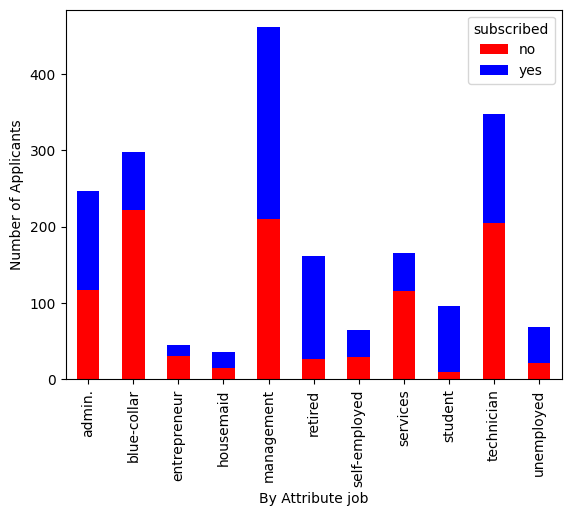

Column: education
Description: education


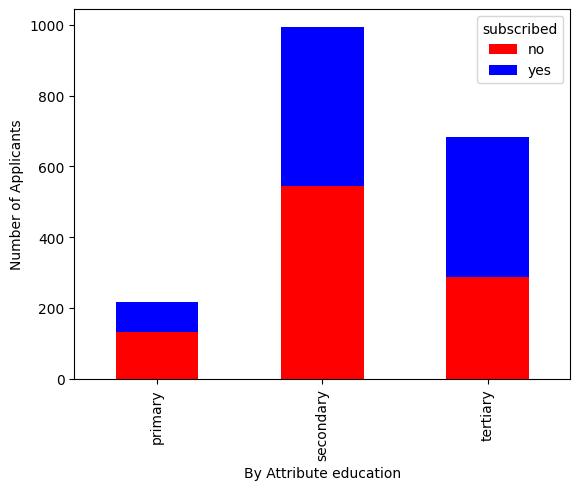

Column: age
Description: age


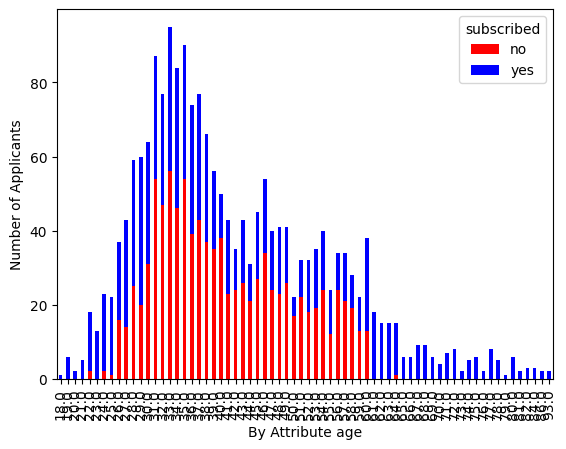

Column: marital
Description: marital status


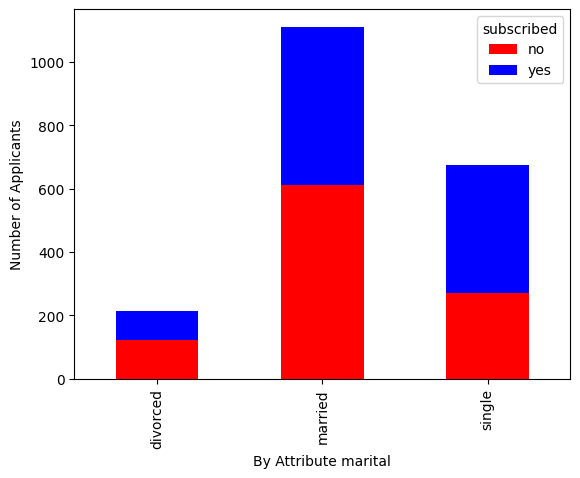

Column: contact
Description:  contact communication type 


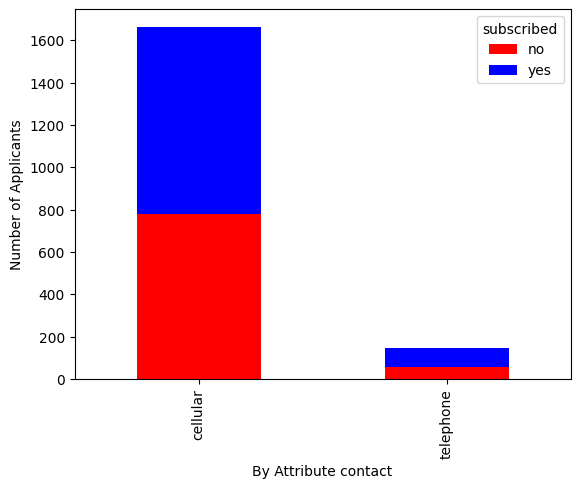

Column: day
Description:  last contact day of the month (numeric)


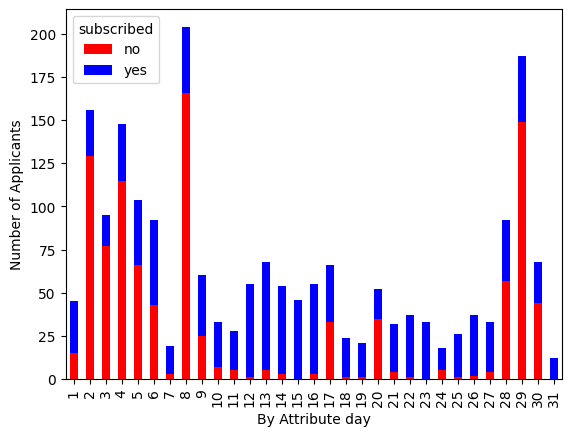

Column: month
Description:  last contact month of year 


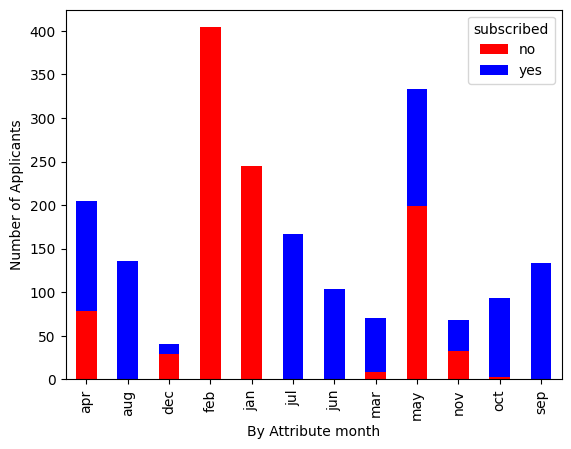

Column: duration
Description:  last contact duration, in seconds (numeric)


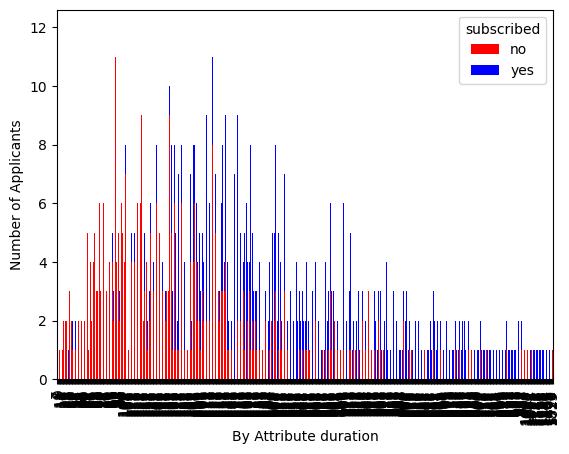

Column: campaign
Description:  number of contacts performed during this campaign and for this client (numeric, includes last contact)


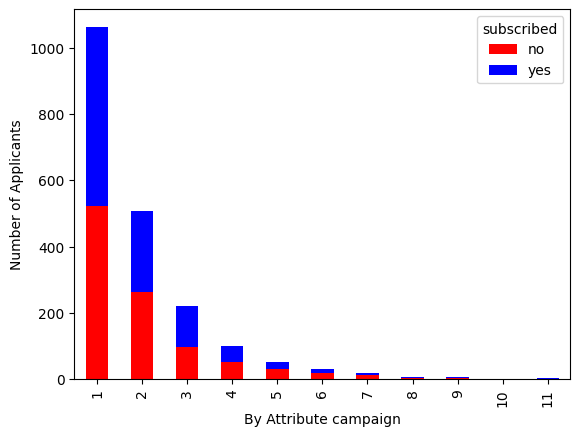

Column: pdays
Description:  number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)


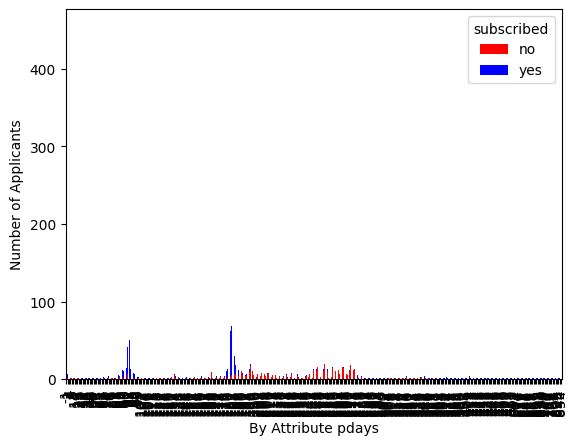

Column: previous
Description:  number of contacts performed before this campaign and for this client (numeric)


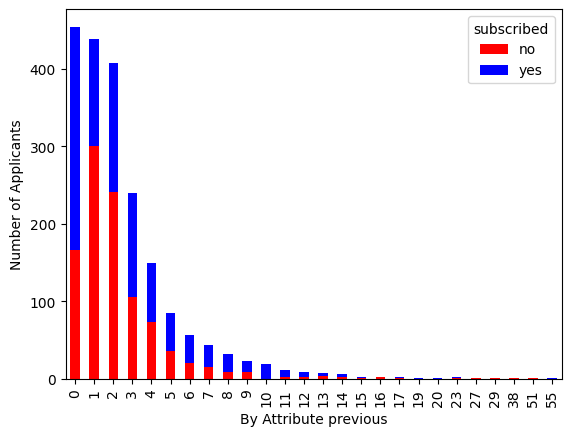

Column: poutcome
Description:  outcome of the previous marketing campaign (categorical: unknown,other,failure,success)


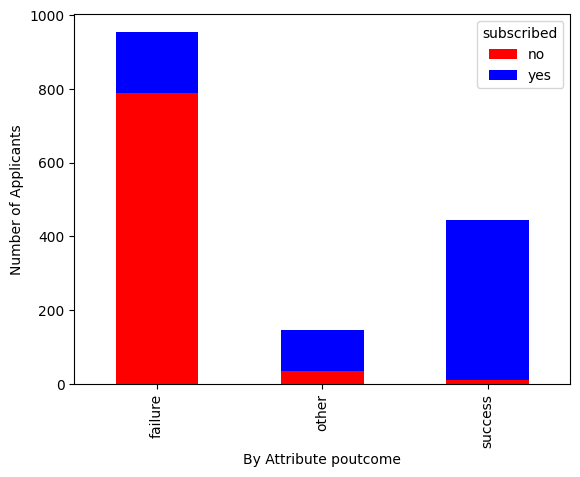

In [12]:
# df.columns, exclude binary columns for the moment
columns_to_graph = ['job','education','age','marital','contact','day','month','duration','campaign','pdays','previous','poutcome']
for column in columns_to_graph:
    print(f"Column: {column}")
    print(f"Description: {col_dict[column]}")
    

    crosstab_CL = pd.crosstab(df[column], df['subscribed'])
    crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
    plt.xlabel('By Attribute ' + column)
    plt.ylabel('Number of Applicants')
    plt.show()

### Correlation matrix of the numeric fields

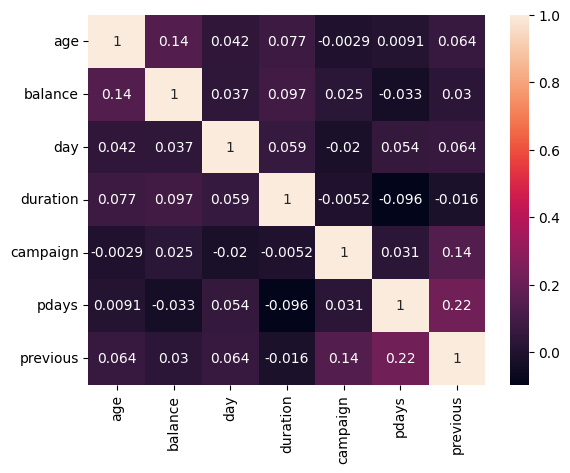

In [13]:
#create correlation matrix of the numeric fields
df_for_heatmap = df.select_dtypes(include=['number'])

sns.heatmap(df_for_heatmap.corr(), annot=True);

**Observations**
1. The strongest correlation (0.14) is between age and balance.  
1. That said, this correlation is low, as are the corralations between the other attributes


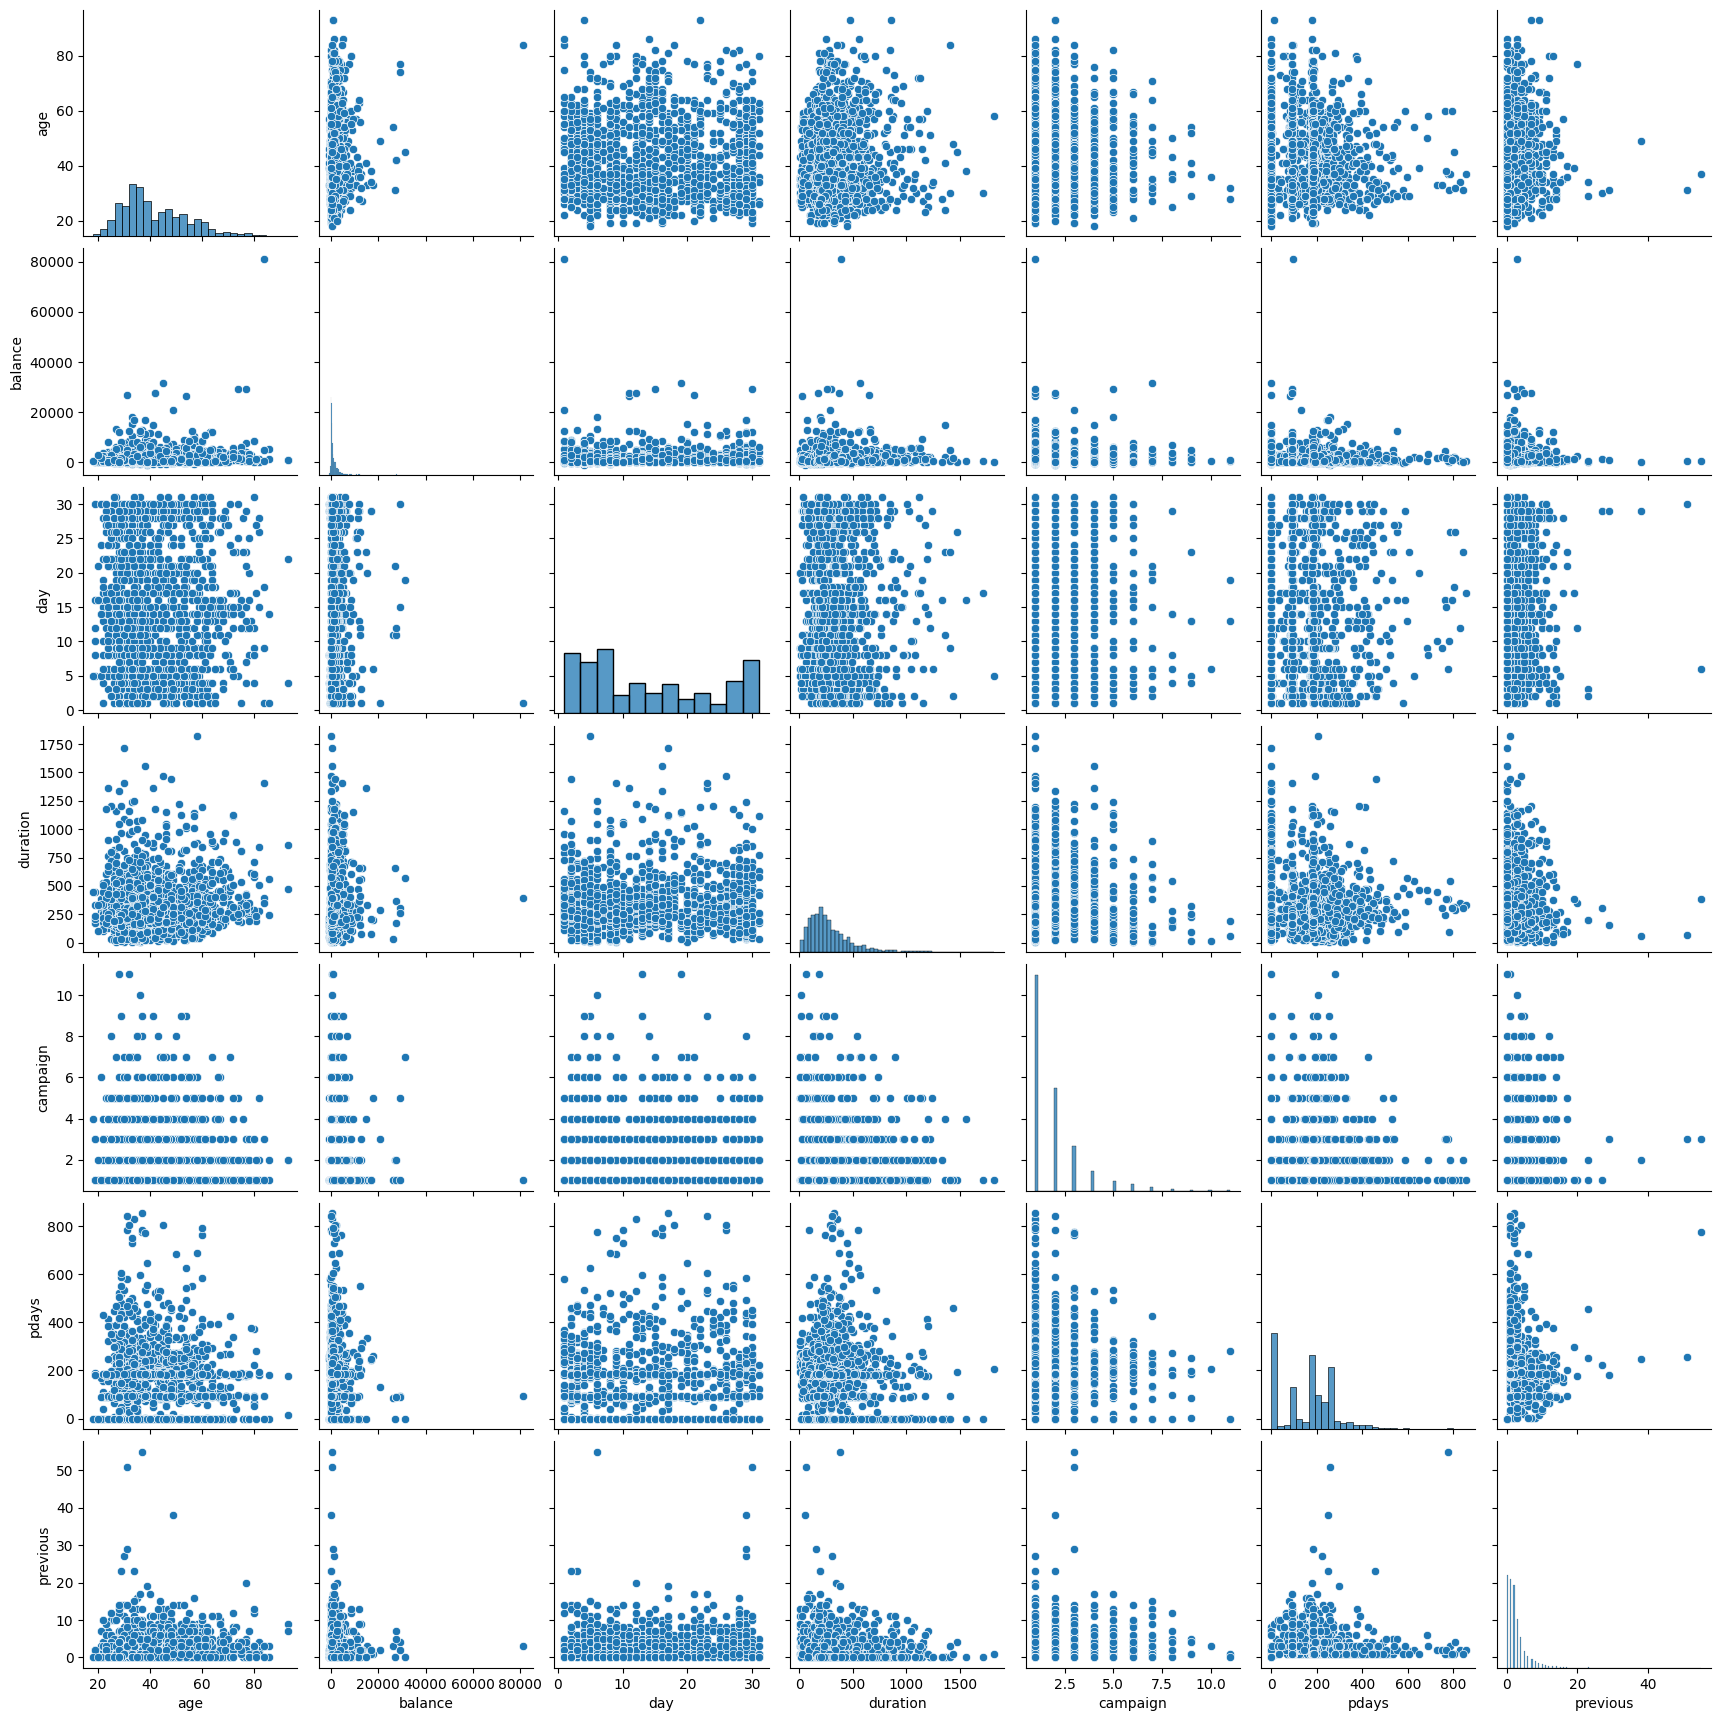

In [14]:
#
#  Given the low correlation between attributes, the pairplots may be of limited value
#
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=df[['age','balance','day','duration','campaign','pdays','previous']].dropna())
plt.show()

# Distribution Analysis for Numerical Atributes

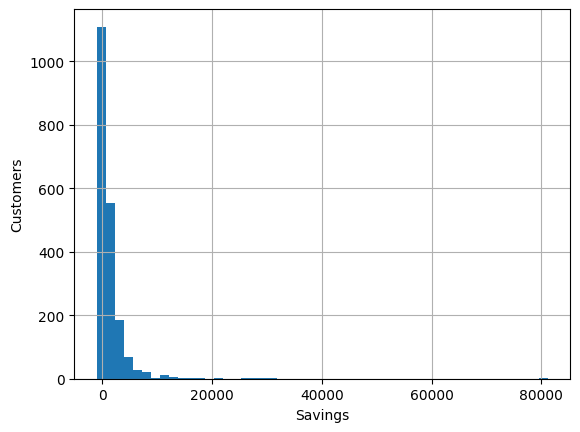

In [15]:
# Let's start by plotting a histogram of ApplicantIncome using the command:

df['balance'].hist(bins=50);
plt.xlabel('Savings');
plt.ylabel('Customers');
plt.show()

The histogram shows that there are a few extreme values for balance.  Examine these with a box plot

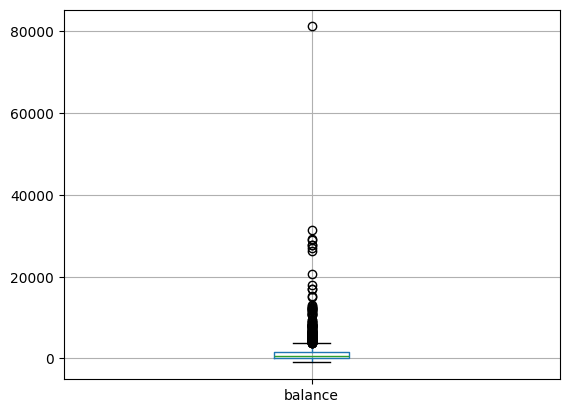

In [16]:
# Drill into Balance with a boxplot:

df.boxplot(column='balance')
plt.show()

The box plot confirms the presence of outliers/extreme values, further examine by age 

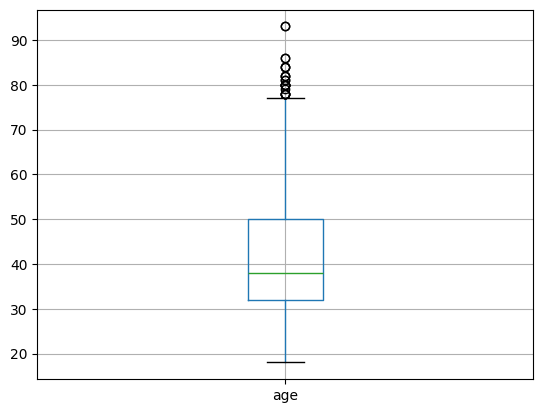

In [17]:
# Let's start by plotting a histogram of ApplicantIncome using the command:

df.boxplot(column='age')
plt.show()

# Examination of Categorical Attributes

**Data Dictionary**
- #4 - education (categorical: "unknown","secondary","primary","tertiary")
- #16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
- #9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
- #17 - y - has the client subscribed a term deposit? (binary: "yes","no")

**Observations on Categorical Columns**
1. 104 missing values for education
1. 181 missing values for contact
1. 454 missing values for poutcome
1. 50% subscribed to a deposit.

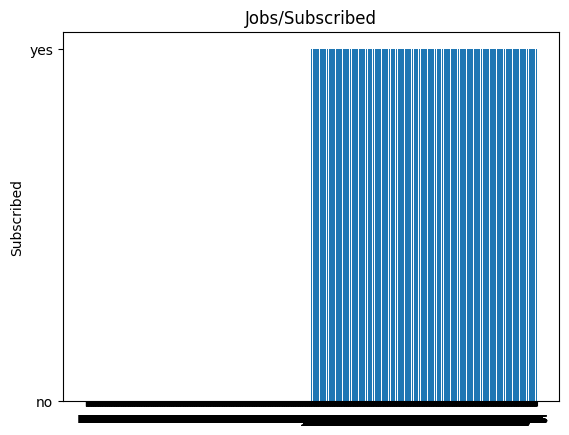

In [18]:

plt.bar(range(len(df['job'])),df['subscribed'])
plt.title('Jobs/Subscribed');
plt.ylabel('Subscribed');
plt.xticks(range(len(df['job'])),df['subscribed'])
plt.show();

# Data Preparation

## Check for Missing Values

In [19]:
### Check for missing values.
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [20]:
### Check for missing values.
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

Summary of Missing Values
1. age, 12 records, < 1% of records
1. job, 10 records, < 1% of records
1. education, 5% of records
1. contact, 9.5% of records
1. poutcome, approx 22.5% of records

Observation: Could consider dropping rows with low records (age, job, maybe education), but dataset is small.

## B. Process and Encode the Categorical Features

In [21]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


### Encode Ordinal Categorical Attributes

In [22]:
# Create a mapper for education - TODO missing values

scale_mapper = {
    "primary": 1,
"secondary":2,
"tertiary":3
}

df['education'] = df['education'].replace(scale_mapper)
df.tail()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,2,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,1,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,1,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,2,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


## One-Hot Encode All Other Categorical Attributes

In [23]:
# first one-hot encode the categorical columns with job, contact, poutcome

df = pd.get_dummies(df, columns=['job', 'contact', 'poutcome'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_services,job_student,job_technician,job_unemployed,job_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan
1995,20.0,single,NaN,no,2785,no,no,16,sep,327,...,False,True,False,False,False,False,False,False,False,True
1996,28.0,single,2,no,127,no,no,16,sep,1334,...,False,False,False,False,False,False,False,False,False,True
1997,81.0,married,1,no,1154,no,no,17,sep,231,...,False,False,False,False,False,True,False,False,False,True
1998,46.0,married,1,no,4343,yes,no,20,sep,185,...,True,False,False,False,False,False,True,False,False,True
1999,40.0,married,2,no,6403,no,no,22,sep,208,...,False,False,False,False,False,False,False,False,False,True


In [24]:
# now one-hot encode all other categorical columns

df = pd.get_dummies(df, drop_first=True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,subscribed_yes
0,32.0,392,1,957,2,131,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,39.0,688,1,233,2,133,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,59.0,1035,1,126,2,239,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,47.0,398,1,274,1,238,2,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,54.0,1004,1,479,1,307,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## C. Treatment of Missing Values in Numerical Columns

In [25]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,subscribed_yes
0,32.0,392,1,957,2,131,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,39.0,688,1,233,2,133,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,59.0,1035,1,126,2,239,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,47.0,398,1,274,1,238,2,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,54.0,1004,1,479,1,307,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Missing Attribute - Age

In [26]:
# look at rows with age missing - only a few rows of the 2000, we could just drop them, but test wants them filled in.
missing_age = df[df['age'].isnull()]
print (missing_age)

      age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
456   NaN      917    6       518         3    212         5            False   
472   NaN      474    9       152         3    221         1             True   
526   NaN     2478   28       347         1    230         1            False   
595   NaN     1857   29       386         1    168         4            False   
597   NaN      254   29       194         1    188         1            False   
601   NaN      111   29        55         1    195         3            False   
605   NaN     1330   29        41         2    261         1            False   
744   NaN      -61   30        90         5    172         1            False   
795   NaN      992    4       301         1     88         2            False   
1171  NaN     2812    3       392         4    181         3            False   
1232  NaN      431   19       418        11    185         5            False   
1408  NaN      251   12     

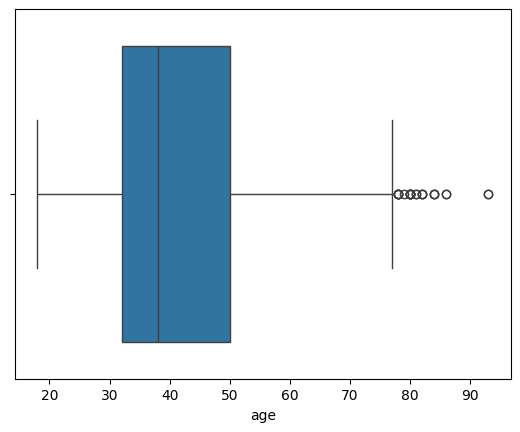

In [27]:
# look at missing values column data - Age - Outliers exist, lets add in the median value
sns.boxplot(x='age', data=df)
plt.show()

# sns.boxplot(x='age', by=['subscribed_yes'],data=df)
# plt.show()

# outliers exist in age, use median age rather than average age
df['age']=df['age'].fillna(df['age'].median())



## Missing Value job 

# look at missing values column data - Job 
rows_with_null_values = df[df['job'].isnull()]
print (rows_with_null_values)
print ('---------------')
valueCounts = df['job'].value_counts(normalize = False, sort=True)
total = valueCounts.sum()

valueCounts['Total'] = total
print(valueCounts)

# look at missing values column data - Education
missing = df[df['education'].isnull()]
print(valueCounts)

# look at missing values column data - Contact
valueCounts = df['contact'].value_counts(normalize = False, sort=True)
total = valueCounts.sum()

valueCounts['Total'] = total
print(valueCounts)

# look at missing values column data
valueCounts = df['poutcome'].value_counts(normalize = False, sort=True)
total = valueCounts.sum()

valueCounts['Total'] = total
print(valueCounts)

ordinal = education.  Nominal = job, martial, default, housing, loan, contact, poutcome, subscribed
Note : Education has missing values

Check for Missing values

In [28]:
# Find the number of nulls/NaNs in the dataset

df.isna().sum()

age                  12
balance               0
day                   0
duration              0
campaign              0
pdays                 0
previous              0
job_blue-collar       0
job_entrepreneur      0
job_housemaid         0
job_management        0
job_retired           0
job_self-employed     0
job_services          0
job_student           0
job_technician        0
job_unemployed        0
job_nan               0
contact_telephone     0
contact_nan           0
poutcome_other        0
poutcome_success      0
poutcome_nan          0
marital_married       0
marital_single        0
education_2           0
education_3           0
default_yes           0
housing_yes           0
loan_yes              0
month_aug             0
month_dec             0
month_feb             0
month_jan             0
month_jul             0
month_jun             0
month_mar             0
month_may             0
month_nov             0
month_oct             0
month_sep             0
subscribed_yes  

## Missing Attribute - Age

## Missing Attribute - Age

### Check all missing attributes filled in

In [29]:
# check that it's done
df.isna().sum()

age                  12
balance               0
day                   0
duration              0
campaign              0
pdays                 0
previous              0
job_blue-collar       0
job_entrepreneur      0
job_housemaid         0
job_management        0
job_retired           0
job_self-employed     0
job_services          0
job_student           0
job_technician        0
job_unemployed        0
job_nan               0
contact_telephone     0
contact_nan           0
poutcome_other        0
poutcome_success      0
poutcome_nan          0
marital_married       0
marital_single        0
education_2           0
education_3           0
default_yes           0
housing_yes           0
loan_yes              0
month_aug             0
month_dec             0
month_feb             0
month_jan             0
month_jul             0
month_jun             0
month_mar             0
month_may             0
month_nov             0
month_oct             0
month_sep             0
subscribed_yes  

In [30]:
## Rescaling Features

In [31]:
##Misc Workings##

# look at missing values column data - Age
sns.boxplot(x='age', y='subscribed', data=df)
plt.show()